<a href="https://colab.research.google.com/github/muhtasimazeez/Data_analysis_with_python/blob/main/myprject_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
dataset=pd.read_csv("/content/heart_disease_cleaned.csv")
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    bool   
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.4+ KB


In [80]:
from sklearn.preprocessing import LabelEncoder
for col in ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    int64  
 3   dataset   919 non-null    int64  
 4   cp        919 non-null    int64  
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    int64  
 8   restecg   919 non-null    int64  
 9   thalch    919 non-null    float64
 10  exang     919 non-null    int64  
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    int64  
 13  ca        919 non-null    float64
 14  thal      919 non-null    int64  
 15  num       919 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 115.0 KB


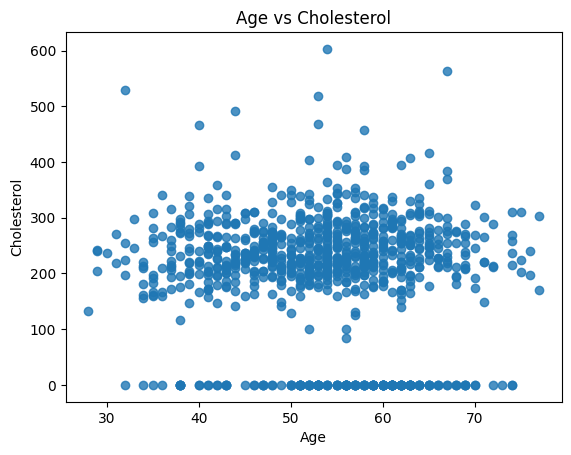

In [82]:
import matplotlib.pyplot as plt
plt.scatter(dataset['age'], dataset['chol'], alpha=0.8)
plt.title("Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

In [83]:
x= dataset.drop(columns=['num'])
y= (dataset["num"] > 0).astype(int)

In [84]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(
    x, y, random_state=42, test_size=0.25, stratify=y
)

In [85]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])

pipeline.fit(xtrain, ytrain)
print("Accuracy:", pipeline.score(xtest, ytest))

Accuracy: 0.8608695652173913


In [86]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000, random_state=42)
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.8608695652173913

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
models = [
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(max_iter=1000, random_state=42)
]
errors = {}
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
for model in models:
  model.fit(xtrain_scaled, ytrain)
  name = type(model).__name__
  score = model.score(xtest_scaled, ytest)*100
  errors[name] = score
print(errors)

{'RandomForestClassifier': 90.43478260869566, 'DecisionTreeClassifier': 86.95652173913044, 'LogisticRegression': 86.08695652173914}


<BarContainer object of 3 artists>

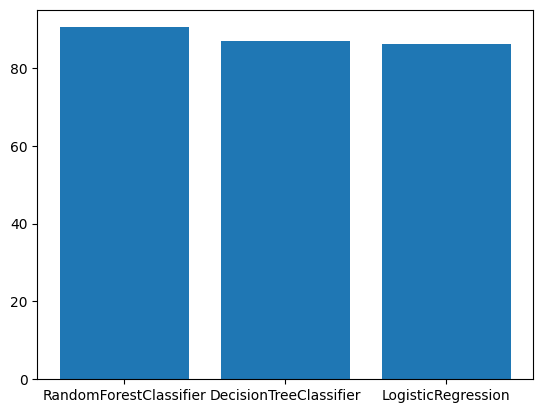

In [88]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())


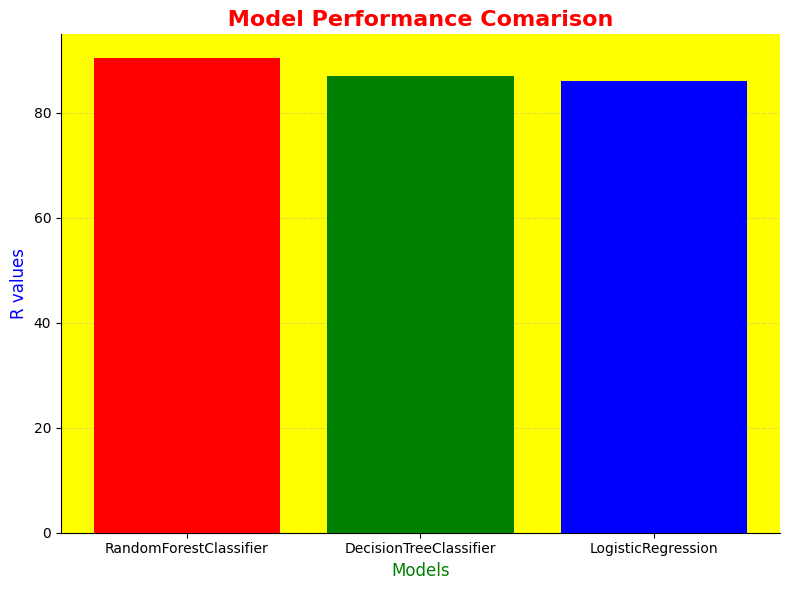

In [89]:
colors = ['red', 'green', 'blue', 'yellow', 'purple']
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=colors[:len(errors)])
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

plt.title(' Model Performance Comarison ', fontsize=16, fontweight='bold', color='red')
plt.xlabel('Models', fontsize=12, color='green')
plt.ylabel('R values', fontsize=12, color='blue')

plt.gca().set_facecolor('yellow')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
